In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
calendar = pd.read_csv('data_procesada/calendar.csv', index_col=0)
calendar.head()

/home/propietario/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,listing_id,date,available,price
0,6369,2021-02-13,1,$50.00
1,6369,2021-02-14,1,$50.00
2,6369,2021-02-15,1,$50.00
3,6369,2021-02-16,1,$50.00
4,6369,2021-02-17,1,$50.00


In [4]:
calendar.shape

(7357924, 4)

In [5]:
reviews = pd.read_csv('data_procesada/reviews.csv', index_col=0)
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6369,29428,2010-03-14,84790,Nancy,Simon and Arturo have the ultimate location in...
1,6369,31018,2010-03-23,84338,David,Myself and Kristy originally planned on stayin...
2,6369,34694,2010-04-10,98655,Marion,We had a great time at Arturo and Simon's ! A ...
3,6369,37146,2010-04-21,109871,Kurt,I very much enjoyed the stay. \r\nIt's a wond...
4,6369,38168,2010-04-26,98901,Dennis,Arturo and Simon are polite and friendly hosts...


In [6]:
reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [7]:
reviews.shape

(632798, 6)

In [8]:
listings = pd.read_csv('data_procesada/listings.csv', index_col=0)
listings.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,4,60,40.45724,-3.67688,2,50,1,78,180
1,9,44,40.40341,-3.74084,2,31,4,33,364
2,0,67,40.38695,-3.69304,0,50,15,0,347
3,3,117,40.42202,-3.70395,0,92,5,10,88
4,3,65,40.41995,-3.69764,0,115,3,68,358


In [9]:
listings.shape

(20156, 9)

In [10]:
vecindario = pd.read_csv('data_procesada/vecindario.csv', index_col = 0)
vecindario.head()

,neighbourhood_group,neighbourhood
0,0,1
1,0,18
2,0,33
3,0,45
4,0,63


In [11]:
vecindario.shape

(128, 2)

## Seasonability

In [12]:
## hay que hacerlo con reviews['date']

In [13]:
date = reviews.drop(['listing_id', 'id', 'reviewer_id', 'reviewer_name', 'comments'] , axis=1)
date.head()

,date
0,2010-03-14
1,2010-03-23
2,2010-04-10
3,2010-04-21
4,2010-04-26


In [14]:
date.shape

(632798, 1)

In [15]:
date.dtypes

date    object
dtype: object

In [16]:
## sobreescribimos el date para hacerlo del tipo datetime64[ns] en vez de object
date['date'] = pd.to_datetime(date.date) 

In [17]:
date.dtypes

date    datetime64[ns]
dtype: object

In [18]:
date.head()

,date
0,2010-03-14
1,2010-03-23
2,2010-04-10
3,2010-04-21
4,2010-04-26


In [19]:
year = date.date.dt.year

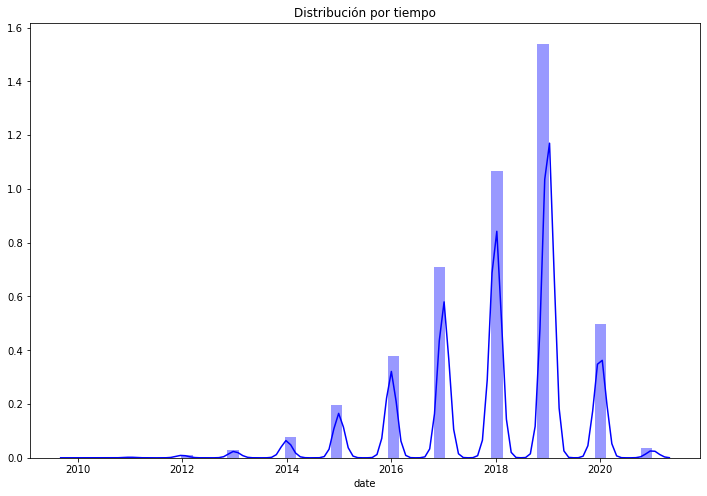

In [20]:
plt.figure(figsize=(12, 8))
sns.distplot(year, 
             color='blue')
plt.title('Distribución por tiempo')
plt.show()

In [21]:
month = date.date.dt.month

In [22]:
month.head()

0    3
1    3
2    4
3    4
4    4
Name: date, dtype: int64

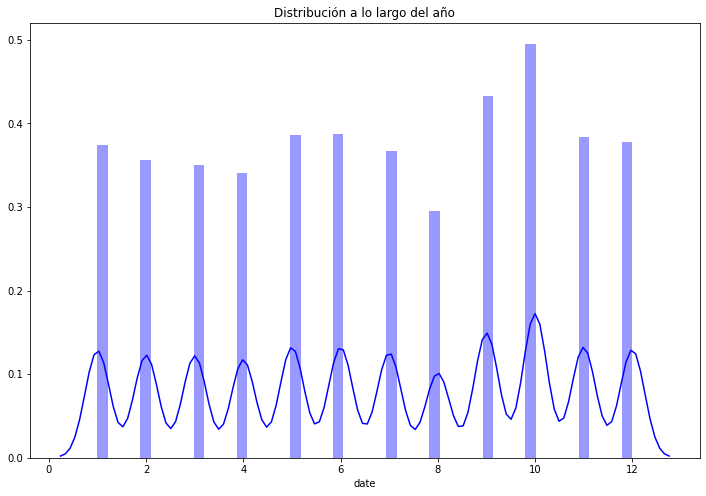

In [23]:
plt.figure(figsize=(12, 8))
sns.distplot(month, 
             color='blue')
plt.title('Distribución a lo largo del año')
plt.show()

## Puntos por barrios

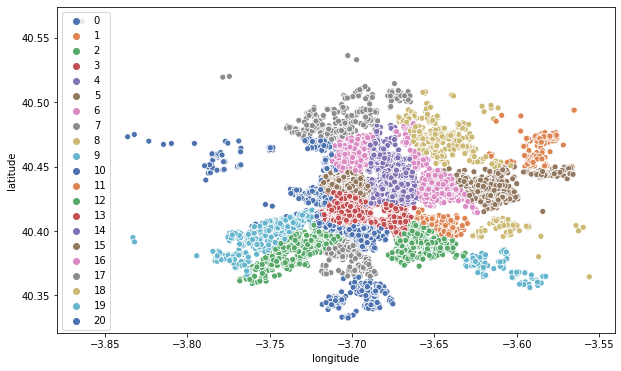

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(listings.longitude,listings.latitude,hue=listings.neighbourhood_group.tolist(), palette="deep")
plt.ioff()

## Puntos por tipo de habitación

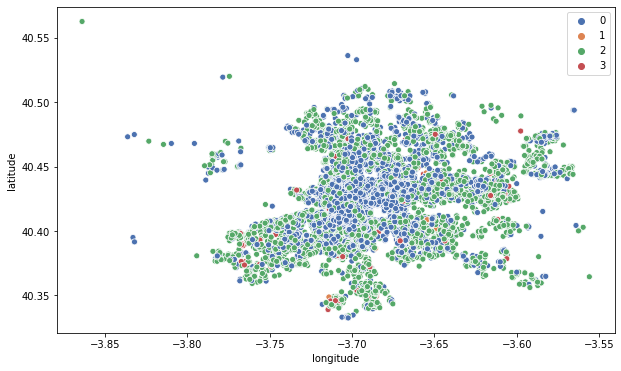

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(listings.longitude,listings.latitude,hue=listings.room_type.tolist(), palette="deep")
plt.ioff()

### WORDCLOUD

In [26]:
from wordcloud import WordCloud

In [27]:
#como ya le hemos hecho label encoding hay que cargar una base con las letras en neighbourhood

In [28]:
listings_antiguo = pd.read_csv('data_util/listings.csv')
listings_antiguo.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,50,1,78,2020-09-20,0.59,1,180
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,31,4,33,2018-07-15,0.43,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,7,347
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,92,5,10,2020-03-01,0.13,1,88
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.58,1,358


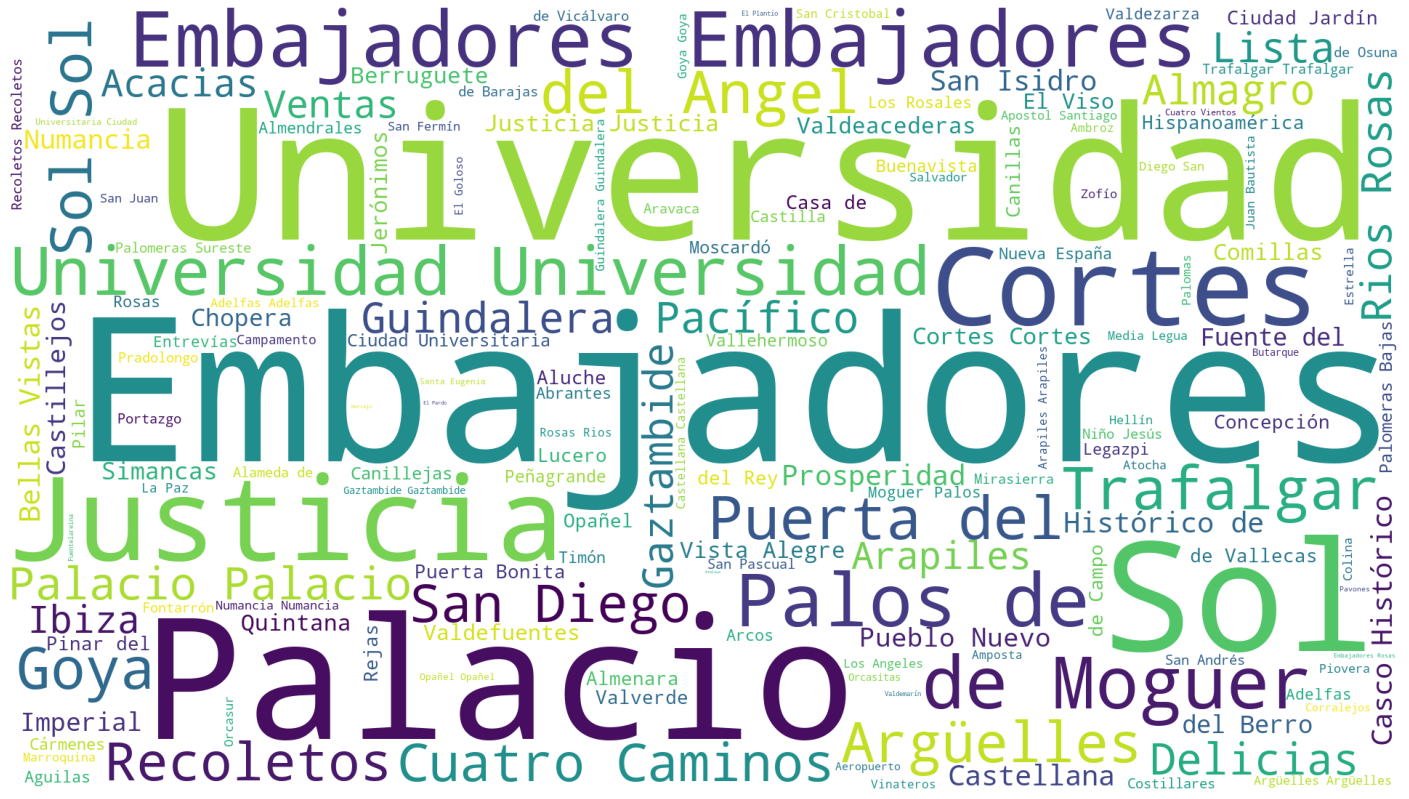

In [29]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(listings_antiguo.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

### Distribucion del precio

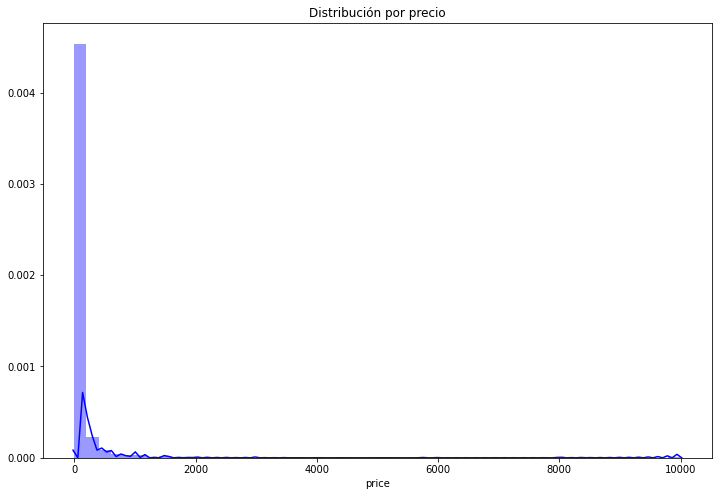

In [30]:
plt.figure(figsize=(12, 8))
sns.distplot(listings['price'], 
             color='blue')
plt.title('Distribución por precio')
plt.show()
## no nos dice mucho la grafica, voy a acortarla un poco

In [31]:
## no nos dice mucho la grafica, voy a acortarla un poco

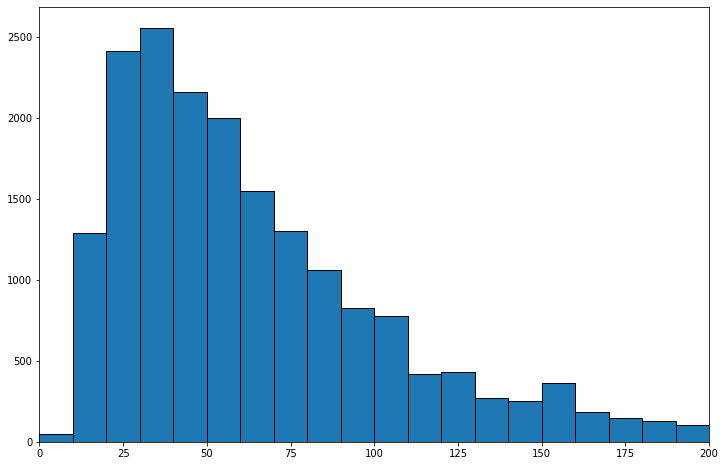

In [32]:
plt.figure(figsize=(12,8))
plt.hist(listings['price'], 1000, edgecolor='black')
plt.xlim(0,200)
plt.show()

### HEATMAP CORRELACIONES

In [33]:
## Matriz de correlación entre los labels
listings = listings.corr()
listings

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
neighbourhood_group,1.000000,-0.164981,0.102338,0.360688,0.109559,0.025159,0.005431,-0.145001,0.025190
neighbourhood,-0.164981,1.000000,0.029947,0.007793,-0.009608,-0.015553,-0.007510,0.025569,0.003983
latitude,0.102338,0.029947,1.000000,0.244346,-0.027866,0.012278,0.006605,-0.046717,-0.003320
longitude,0.360688,0.007793,0.244346,1.000000,0.088555,0.036536,-0.016177,-0.037930,0.008831
room_type,0.109559,-0.009608,-0.027866,0.088555,1.000000,-0.082346,-0.015618,-0.148177,-0.030074
price,0.025159,-0.015553,0.012278,0.036536,-0.082346,1.000000,0.021335,-0.034366,-0.018701
minimum_nights,0.005431,-0.007510,0.006605,-0.016177,-0.015618,0.021335,1.000000,-0.028516,0.043857
number_of_reviews,-0.145001,0.025569,-0.046717,-0.037930,-0.148177,-0.034366,-0.028516,1.000000,0.017677
availability_365,0.025190,0.003983,-0.003320,0.008831,-0.030074,-0.018701,0.043857,0.017677,1.000000


<AxesSubplot:>

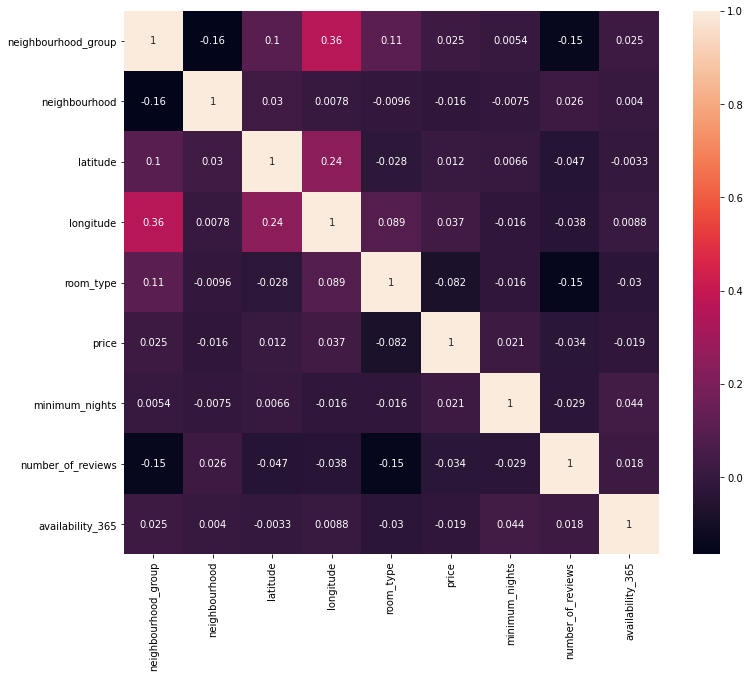

In [34]:
## Heatmap de correlación entre los labels
fig, ax = plt.subplots(figsize = (12,10))

sns.heatmap(listings, annot=True)

### VIOLIN PLOT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Chamartín'),
  Text(1, 0, 'Latina'),
  Text(2, 0, 'Arganzuela'),
  Text(3, 0, 'Centro'),
  Text(4, 0, 'Salamanca'),
  Text(5, 0, 'Fuencarral - El Pardo'),
  Text(6, 0, 'Puente de Vallecas'),
  Text(7, 0, 'Ciudad Lineal'),
  Text(8, 0, 'Chamberí'),
  Text(9, 0, 'Villaverde'),
  Text(10, 0, 'Hortaleza'),
  Text(11, 0, 'Moncloa - Aravaca'),
  Text(12, 0, 'Carabanchel'),
  Text(13, 0, 'Tetuán'),
  Text(14, 0, 'Retiro'),
  Text(15, 0, 'San Blas - Canillejas'),
  Text(16, 0, 'Villa de Vallecas'),
  Text(17, 0, 'Barajas'),
  Text(18, 0, 'Usera'),
  Text(19, 0, 'Moratalaz'),
  Text(20, 0, 'Vicálvaro')])

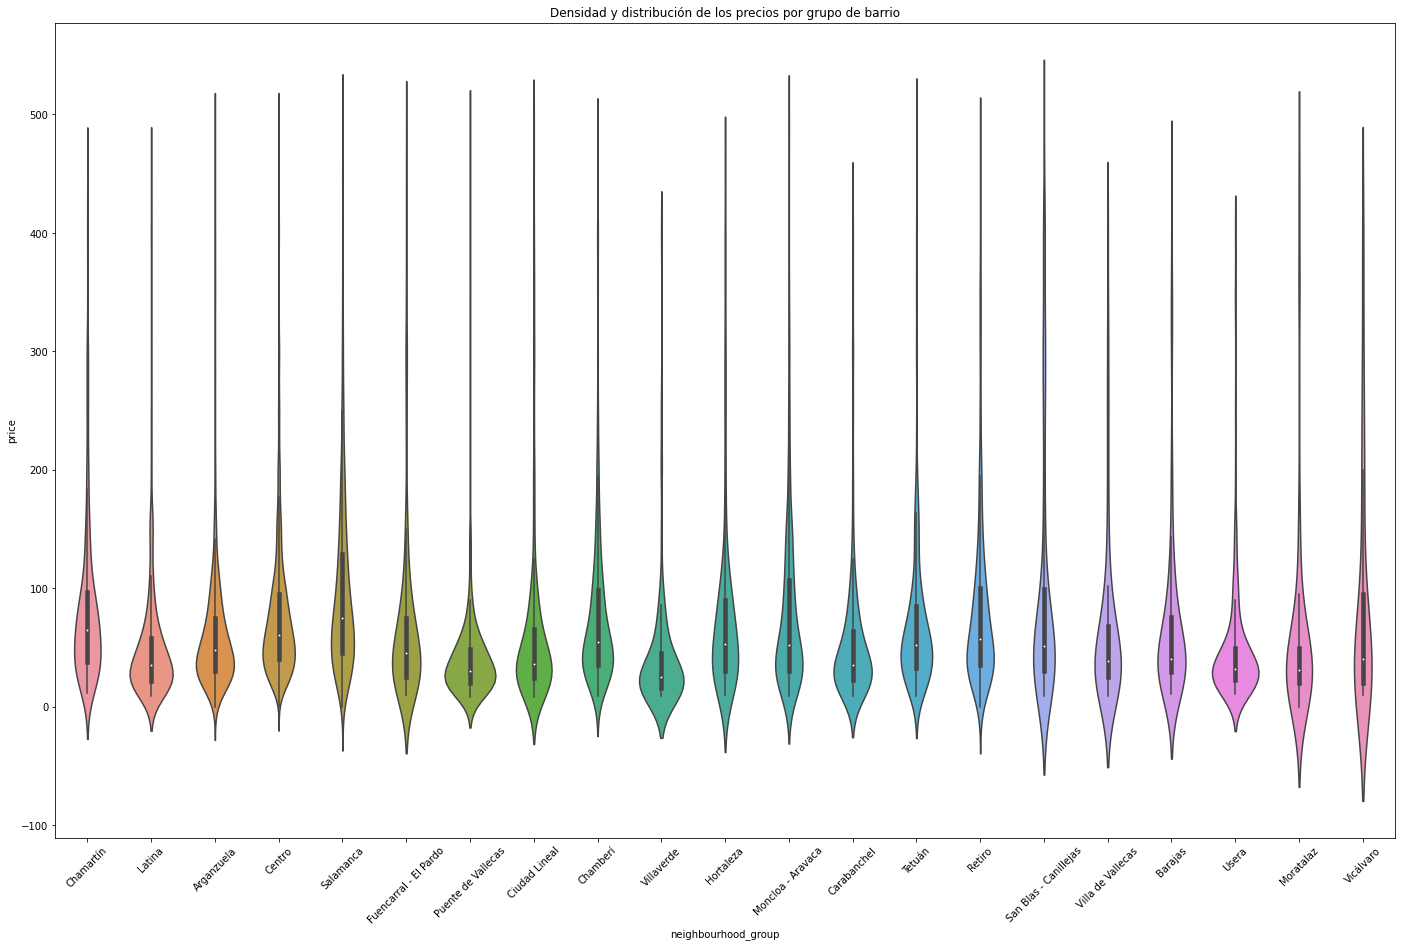

In [35]:
fig, ax = plt.subplots(figsize = (24,15))

sub_6 = listings_antiguo[listings_antiguo.price < 500]

viz_2 = sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Densidad y distribución de los precios por grupo de barrio')
plt.xticks(rotation=45)

## Mapa interactivo

In [2]:
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import altair as alt

In [3]:
## importo la lista de las casas
listings = pd.read_csv('data_util/listings.csv')
listings.shape

(20156, 16)

In [4]:
## me piden maximos y minimos tango en longitud como en latitud. Saber cuales son en el dataset, y dar un poco
## mas de margen
print(listings.latitude.max()), print(listings.latitude.min())

40.562740000000005
40.33243


(None, None)

In [5]:
print(listings.longitude.max()), print(listings.longitude.min())

-3.556
-3.8639099999999997


(None, None)

In [6]:
#Coordenadas para el mapa
box = (listings.longitude.min(), listings.longitude.max(), listings.latitude.min(), listings.latitude.max())
box1 = (40.33243,40.56274,-3.8639099999999997,-3.556)

In [10]:
df_density_mapbox = listings.sample(n=20156)
map_center = {'lat':df_density_mapbox.latitude.mean(), 'lon':df_density_mapbox.longitude.mean()}
fig = px.density_mapbox(df_density_mapbox, lat='latitude', lon='longitude',z='price',title=10*'  '+'Densidad en localización-precio', radius=2.5,
                        center=map_center, zoom=10,
                        mapbox_style='stamen-terrain')
fig.show()